In [145]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from scipy.spatial import distance
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [138]:
d=pd.read_csv('balance.csv')
df=pd.DataFrame(d)
df.head()

,Left-Weight,Left-Distance,Right-Weight,Right-Distance,Class
0,1,1,1,1,B
1,1,1,1,2,R
2,1,1,1,3,R
3,1,1,1,4,R
4,1,1,1,5,R


In [139]:
X = df.values[:, :4]
y = np.zeros(626)

le = preprocessing.LabelEncoder()
le.fit(df.values[:, 4])
y = le.transform(df.values[:, 4])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.08, random_state=42)

In [140]:
d = distance.cdist(X_test,X_train,'euclidean')
print(d.shape)

(50, 575)


In [141]:
for i in range (50):
    z = np.argsort(d,axis=1)

In [163]:
k = 11
y_pre = []
for j in range(50):
    y2 = np.zeros(3)
    for i in range (k):
        n=(z[j][i])
        val= y_train[n]
        y2[val]+=1
        
    y_pre.append(np.argmax(y2, axis=0))
#print(y_pre)
print("Accuracy Score: ",(accuracy_score(y_test, y_pre)))

Accuracy Score:  0.84


In [164]:
k = np.array([1,3,5,7,9,11,13,15])
res=[]

for k2 in k:
    y_pre=[]
    for j in range(50):
        y2 = np.zeros(3)
        for i in range (k2):
            n =(z[j][i])
            val= (y_train[n])
            y2[val]+=1
        
        y_pre.append(np.argmax(y2, axis=0))
    res.append(accuracy_score(y_test, y_pre))

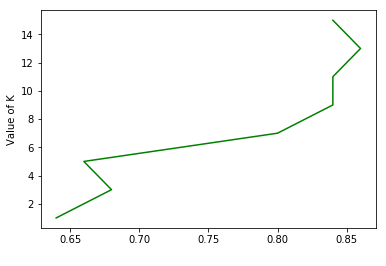

In [165]:
r=np.array(res)
plt.xlabel(" ")
plt.ylabel("Value of K")
plt.plot(r,k, color = 'G' )
plt.show()